<a href="https://colab.research.google.com/github/asrarbhat/machineleanring/blob/main/logistic_regression_and_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#logistic regression

data preprocessing

In [64]:
import pandas as pd
import numpy as np


df=pd.read_csv("mobile.csv")
data=df.values
outputs=data[:,-1].reshape((341,1))
data=data[:,:-1]
data=(data-np.mean(data,axis=0))/(np.std(data,axis=0)+0.001)
inputs=np.hstack([np.ones((data.shape[0],1)),data])
outputs[outputs<=3.5]=0
outputs[outputs>3.5]=1
np.mean(outputs)


 #at the end we want inputs matrix and outputs vector such that inputs X weights = outputs
#inputs=
#outputs=


0.8944281524926686

In [53]:
import numpy as np

In [15]:
def linear_combination(A,X):
    return np.matmul(A,X)

def sigmoid(linear):
    return 1/(1+np.exp(linear*(-1)))


gradient-descent

In [16]:
A=inputs
Y=outputs
A.shape,Y.shape

((341, 88), (341, 1))

In [65]:
#hyperparameters

no_of_iterations=1000000

no_of_samples=A.shape[0]

learing_rate=0.001/no_of_samples

#initial weights
weights=np.random.rand(A.shape[1],1)

In [66]:
def derivative(A,Y):

    temp1=np.matmul(A,weights)

    temp2=sigmoid(temp1)
    temp3=(temp2-Y)
    temp4=temp2*(1-temp2)
    temp5=temp3*temp4
    temp6=np.matmul(np.transpose(temp5),A)
    
    return np.transpose(temp6)

In [67]:
#gradient descent in action
error=[]
for i in range(no_of_iterations):
    error.append(np.sum((Y-sigmoid(linear_combination(A,weights)))**2)/no_of_samples)
    weights-=learing_rate*derivative(A,Y)

visualization of error

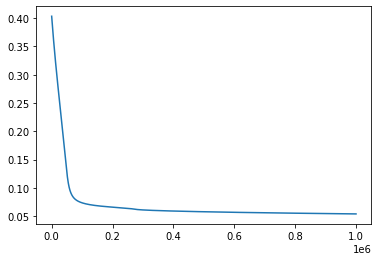

In [68]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(error)),error)
plt.show()

#perceptron

In [61]:
#hyperparameters

no_of_iterations=1000000

no_of_samples=A.shape[0]

learing_rate=1

#initial weights
weights=np.random.rand(A.shape[1],1)

In [62]:
error=[]
import random
inputs_transpose=np.transpose(inputs)
for i in range(no_of_iterations):
    out=np.array(linear_combination(inputs,weights)>=0,dtype=int)
    temp=outputs-out
    j=random.randint(0,temp.shape[0]-1)
    if temp[j][0]>0:
        weights+=learing_rate*(inputs_transpose[:,j].reshape(weights.shape))
    elif temp[j][0]<0:
        weights-=learing_rate*(inputs_transpose[:,j].reshape(weights.shape))
    error.append(np.sum(temp*temp))

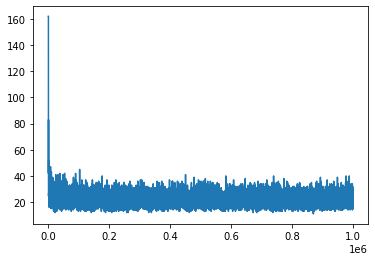

In [63]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(error)),error)
plt.show()